<a href="https://colab.research.google.com/github/portoran/RFM-Analysis/blob/main/RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def read_excel(file_path):
    df = pd.read_excel(file_path)

    df = df.drop_duplicates()
    return df

In [3]:
df = read_excel('db.xlsx')

In [4]:
df.shape

(35334, 14)

In [5]:
df.head()

,INVOICE NO,INVOICE DATE,CUST CODE,CUST NAME,STATE,PRODUCT GROUP NAME,ITEM GROUP NAME,ITEM TYPE NAME,ITEM CODE,ITEM NAME,ITEM DESC.,BRAND NAME,QTY,PRICE
0,PS/08003-000/VA000043,2018-01-06,CAS020,CASH (SBY),JAWA TIMUR,AUTOMOTIVE,FILTER,OIL FILTER,C-1804,15208-W1116,(15208-W1116) - OIL FILTER,SAKURA,3,51200
1,PS/08003-000/VA000046,2018-01-06,CAS020,CASH (SBY),JAWA TIMUR,AUTOMOTIVE,FILTER,FUEL FILTER,FC-1805,16403-99002=,(16403-99002) - FUEL FILTER,SAKURA,4,51100
2,PS/08003-000/VA000057,2018-01-06,CAS020,CASH (SBY),JAWA TIMUR,HEAVY DUTY,FILTER,FUEL FILTER,P55-3004,J86-20731=,(J86-20731) - FUEL FILTER,DONALDSON,2,51600
3,PS/08003-000/VA000350,2018-01-06,JEM003,PT. JEMBER INDAH JAYA,JAWA TIMUR,AUTOMOTIVE,FILTER,AIR FILTER,A-1007,MT 421158,(MT 421158) - AIR FILTER,SAKURA,5,52200
4,PS/08003-000/VA000057,2018-01-06,CAS020,CASH (SBY),JAWA TIMUR,HEAVY DUTY,FILTER,OIL FILTER,P55-8616,J86-10345,(J86-10345) - OIL FILTER,DONALDSON,2,52900


In [6]:
# Check duplicate
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35334 entries, 0 to 35340
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   INVOICE NO          35334 non-null  object        
 1   INVOICE DATE        35334 non-null  datetime64[ns]
 2   CUST CODE           35334 non-null  object        
 3   CUST NAME           35334 non-null  object        
 4   STATE               35334 non-null  object        
 5   PRODUCT GROUP NAME  35334 non-null  object        
 6   ITEM GROUP NAME     35334 non-null  object        
 7   ITEM TYPE NAME      35334 non-null  object        
 8   ITEM CODE           35334 non-null  object        
 9   ITEM NAME           35334 non-null  object        
 10  ITEM DESC.          35334 non-null  object        
 11  BRAND NAME          35334 non-null  object        
 12  QTY                 35334 non-null  int64         
 13  PRICE               35334 non-null  int64     

**Exploratory Data Analysis**

In [8]:
eda_data = df.copy()

# Validate data copy
print('Original:',df.shape)
print('Copy:',eda_data.shape)

Original: (35334, 14)
Copy: (35334, 14)


**EDA - 1**

In [9]:
# Description
eda_data.describe()

,QTY,PRICE
count,35334.000000,3.533400e+04
mean,14.343041,2.044396e+05
std,32.509309,3.898415e+05
min,1.000000,4.990000e+04
25%,2.000000,7.300000e+04
50%,5.000000,1.032000e+05
75%,12.000000,1.924750e+05
max,1500.000000,6.870600e+06


In [10]:
# Check missing value
eda_data.isna().sum()

INVOICE NO            0
INVOICE DATE          0
CUST CODE             0
CUST NAME             0
STATE                 0
PRODUCT GROUP NAME    0
ITEM GROUP NAME       0
ITEM TYPE NAME        0
ITEM CODE             0
ITEM NAME             0
ITEM DESC.            0
BRAND NAME            0
QTY                   0
PRICE                 0
dtype: int64

In [11]:
# Check cust code

len(set(eda_data['CUST CODE']))

509

In [12]:
min_date = eda_data['INVOICE DATE'].min()
max_date = eda_data['INVOICE DATE'].max()

print(f'First Transaction Date: {min_date}')
print(f'Last Transaction Date: {max_date}')

First Transaction Date: 2016-02-06 00:00:00
Last Transaction Date: 2019-03-31 00:00:00


**Create RFM Features**

In [13]:
latest_date = pd.to_datetime('2019-07-23')

latest_date

Timestamp('2019-07-23 00:00:00')

In [14]:
def cal_recency(x): # Calculate recency
    return (latest_date - x.max()).days

def cal_tenure(x): # Calculate tenure
    return (x.max() - x.min()).days

def cal_frequency(x): # Calculate frequency
    return len(set(x))

def rfmt(df):
    df['TOTAL'] = df['QTY'] * df['PRICE']

    agg_dict = {
        'INVOICE DATE': [cal_recency, cal_tenure],
        'INVOICE NO': cal_frequency,
        'TOTAL': 'sum'
    }
    data_rfm = df.groupby('CUST CODE').agg(agg_dict)
    data_rfm.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']

    return data_rfm


In [15]:
eda_rfm_data = rfmt(df=eda_data)

# Validate
assert eda_rfm_data.shape[0] == eda_data['CUST CODE'].nunique()

print('RFM data shape:', eda_rfm_data.shape)
eda_rfm_data.head()

RFM data shape: (509, 4)


,Recency,Tenure,Frequency,Monetary
CUST CODE,,,,
AAJ002,173,337,19,9246600
ABA008,380,0,1,349700
ACH002,234,317,13,6549600
ACH003,212,318,46,85980500
ADI007,934,122,2,2255300


**EDA - 2**


In [16]:
eda_rfm_data.describe()

,Recency,Tenure,Frequency,Monetary
count,509.000000,509.000000,509.000000,5.090000e+02
mean,317.137525,218.781925,34.827112,1.266444e+08
std,211.344069,194.589841,157.251809,6.710974e+08
min,114.000000,0.000000,1.000000,5.750000e+04
25%,173.000000,11.000000,2.000000,2.200800e+06
50%,235.000000,245.000000,7.000000,9.852000e+06
75%,397.000000,334.000000,21.000000,4.423190e+07
max,1229.000000,1095.000000,2886.000000,9.115633e+09


In [17]:
eda_rfm_data[eda_rfm_data['Frequency'] == 1] # Check Frequency

,Recency,Tenure,Frequency,Monetary
CUST CODE,,,,
ABA008,380,0,1,349700
ADI011,528,0,1,2956000
AGR003,844,0,1,1528600
ARG003,934,0,1,990600
ASI001,517,0,1,2200800
...,...,...,...,...
TUN024,402,0,1,205200
UNG003,559,0,1,172400
USA007,691,0,1,2620000


In [18]:
eda_rfm_data[eda_rfm_data['Tenure'] == 0].sample(5)

,Recency,Tenure,Frequency,Monetary
CUST CODE,,,,
SUM028,538,0,2,1072200
NUS008,517,0,1,107000
PAN020,328,0,1,4013400
GAR010,951,0,1,240400
SIN083,449,0,1,5737000


In [19]:
eda_rfm_data[eda_rfm_data['Frequency'] == 1]['Monetary'].describe()

count    1.210000e+02
mean     2.316110e+06
std      4.163298e+06
min      5.750000e+04
25%      5.600000e+05
50%      1.278700e+06
75%      2.517600e+06
max      3.639400e+07
Name: Monetary, dtype: float64

In [20]:
eda_rfm_data = eda_rfm_data[eda_rfm_data['Frequency'] >= 2] # exclude one time buyer

# validate
eda_rfm_data.describe()

,Recency,Tenure,Frequency,Monetary
count,388.000000,388.000000,388.000000,3.880000e+02
mean,250.381443,287.010309,45.376289,1.654169e+08
std,143.929888,173.410924,178.858389,7.647483e+08
min,114.000000,0.000000,2.000000,2.382000e+05
25%,173.000000,192.750000,4.750000,5.383000e+06
50%,215.000000,304.000000,11.000000,1.862100e+07
75%,283.000000,335.000000,31.000000,7.216920e+07
max,1026.000000,1095.000000,2886.000000,9.115633e+09


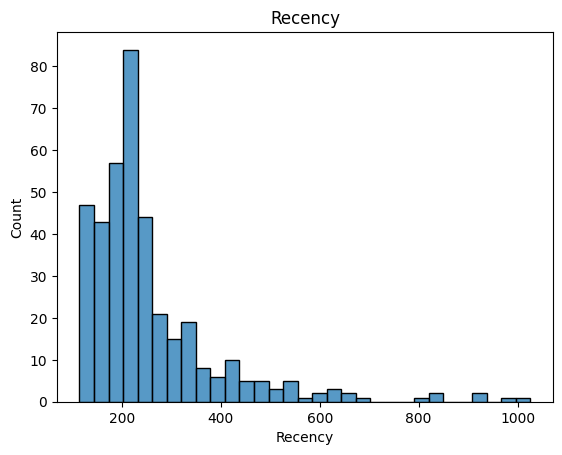

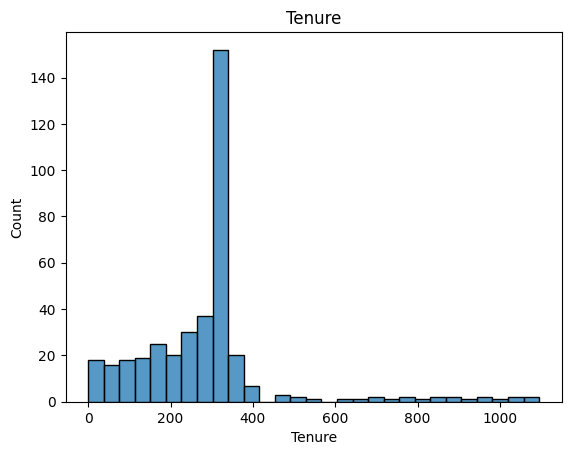

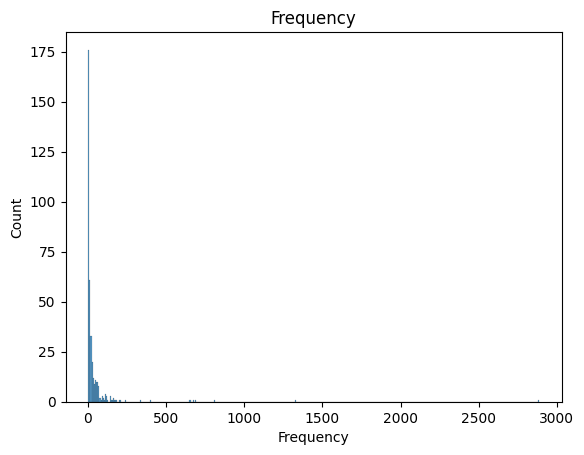

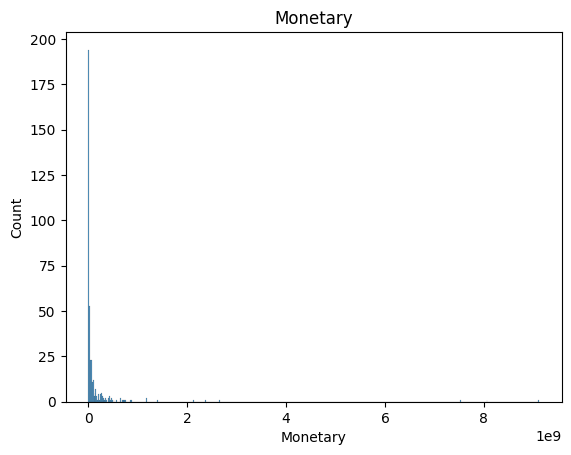

In [21]:
# CHeck data distribution
for col in eda_rfm_data.columns:
    x = eda_rfm_data[col]
    sns.histplot(x)
    plt.title(col)
    plt.show();

In [22]:

def drop_outlier(df, cols):
    data_clean = df.copy()

    # Create subplots
    fig, axes = plt.subplots(len(cols), 2, figsize=(12, 8))

    # Before
    for i, col in enumerate(cols):
        axes[i, 0].boxplot(df[col])
        axes[i, 0].set_title(f'{col} (Before)')
        axes[i, 0].set_ylabel(col)

    for col in cols:
        q1, q3 = np.quantile(data_clean[col], q=[0.25, 0.75])
        iqr = q3 - q1
        ub = q3 + 1.5 * iqr
        lb = q1 - 1.5 * iqr

        cond_data_1 = data_clean[col] <= ub
        cond_data_2 = data_clean[col] >= lb
        data_clean = data_clean[cond_data_1 & cond_data_2]

    # After
    for i, col in enumerate(cols):
        axes[i, 1].boxplot(data_clean[col])
        axes[i, 1].set_title(f'{col} (After)')
        axes[i, 1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

    return data_clean

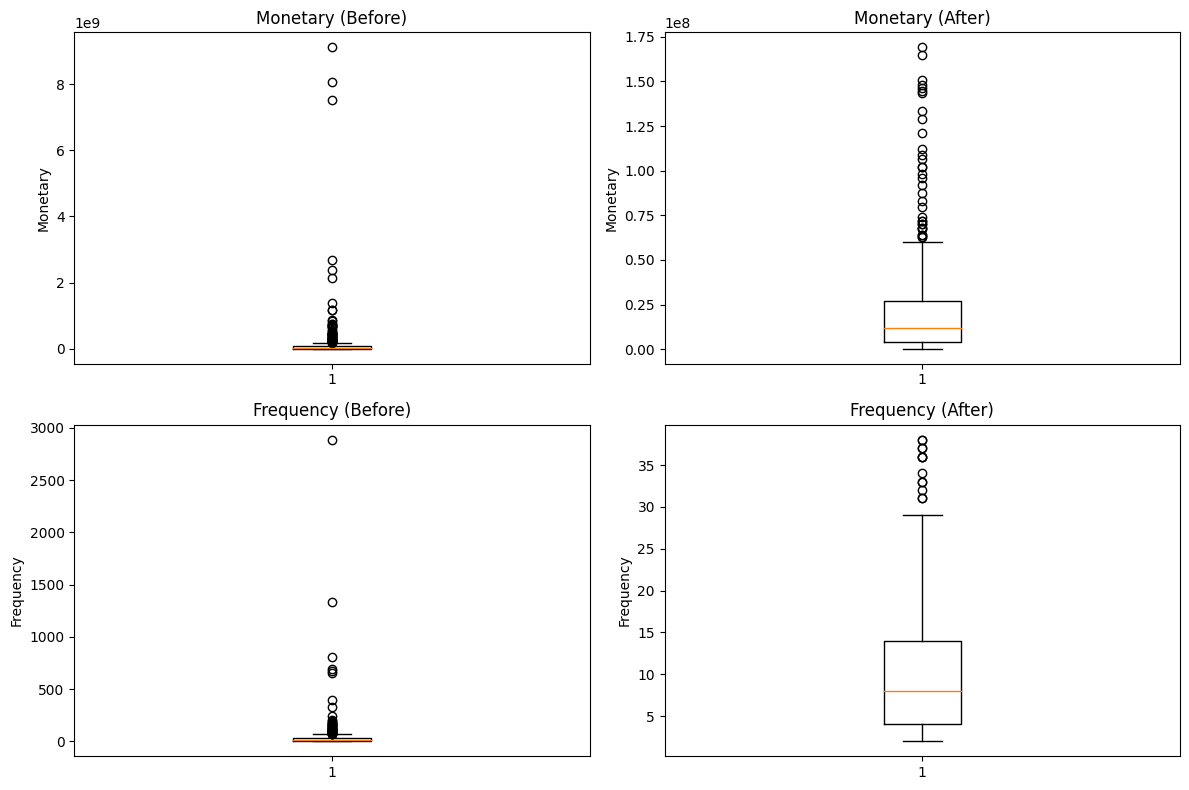

,Recency,Tenure,Frequency,Monetary
count,298.000000,298.000000,298.000000,2.980000e+02
mean,281.694631,258.600671,10.385906,2.363411e+07
std,149.135751,162.555367,8.665622,3.220031e+07
min,114.000000,0.000000,2.000000,2.382000e+05
25%,204.000000,153.000000,4.000000,3.733975e+06
50%,235.000000,272.000000,8.000000,1.156830e+07
75%,323.000000,328.750000,14.000000,2.701790e+07
max,1026.000000,1034.000000,38.000000,1.690760e+08


EDA data shape : (298, 4)


In [23]:
# Remove outlier
eda_rfm_data = drop_outlier(df = eda_rfm_data,
                            cols = ['Monetary', 'Frequency'])

# Validate
print('EDA data shape :', eda_rfm_data.shape)
eda_rfm_data.describe()

**Data Preprocessing**

In [24]:
def preprocess_raw(df):
    data_raw = df.dropna(subset=['CUST CODE'])

    data_rfm = rfmt(df=data_raw)

    assert data_rfm.shape[0] == data_raw['CUST CODE'].nunique()
    print('RFM data shape:', data_rfm.shape)

    return data_rfm

In [25]:
data_rfm = preprocess_raw(df = eda_data)

data_rfm.head()

RFM data shape: (509, 4)


,Recency,Tenure,Frequency,Monetary
CUST CODE,,,,
AAJ002,173,337,19,9246600
ABA008,380,0,1,349700
ACH002,234,317,13,6549600
ACH003,212,318,46,85980500
ADI007,934,122,2,2255300


In [50]:
def preprocess_rfm(data_rfm):
    data_freq = data_rfm[data_rfm['Frequency'] >= 2]
    data_clean = drop_outlier(data_freq, ['Monetary', 'Frequency'])
    data_clean = data_clean[['Recency', 'Frequency', 'Monetary']]
    data_clean['Freq_Rank'] = data_clean['Frequency'].argsort().argsort() + 1

    print('Data shape:', data_clean.shape)
    return data_clean

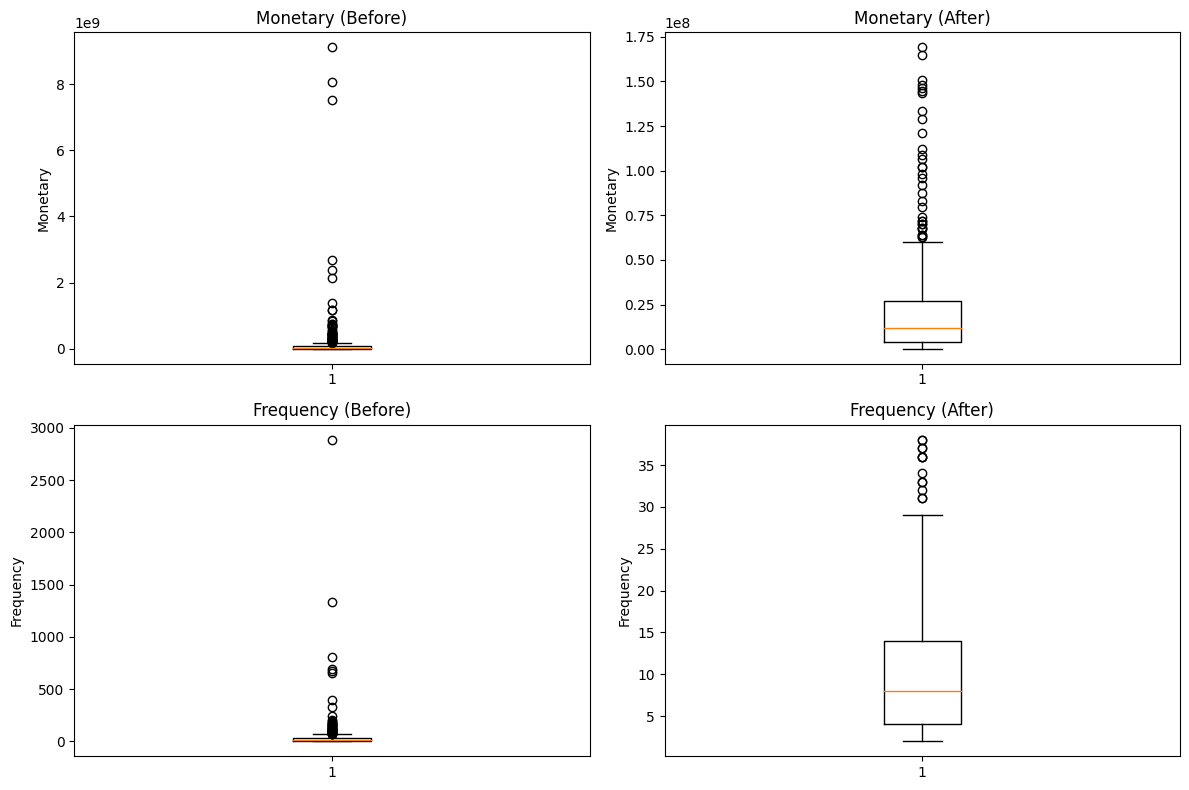

Data shape: (298, 4)


,Recency,Frequency,Monetary,Freq_Rank
count,298.000000,298.000000,2.980000e+02,298.000000
mean,281.694631,10.385906,2.363411e+07,149.500000
std,149.135751,8.665622,3.220031e+07,86.169407
min,114.000000,2.000000,2.382000e+05,1.000000
25%,204.000000,4.000000,3.733975e+06,75.250000
50%,235.000000,8.000000,1.156830e+07,149.500000
75%,323.000000,14.000000,2.701790e+07,223.750000
max,1026.000000,38.000000,1.690760e+08,298.000000


In [51]:
data_rfm_clean = preprocess_rfm(data_rfm = data_rfm)
data_rfm_clean.describe()

**Normalize**

In [52]:
from sklearn.preprocessing import MinMaxScaler

def fit_scaler(df):
    # Create & fit scaler
    scaler = MinMaxScaler()
    scaler.fit(df)

    return scaler

def transform_scaler(df, scaler):
    # Transform scaler
    data_clean = pd.DataFrame(scaler.transform(df))
    data_clean.index = df.index
    data_clean.columns = df.columns

    # Validate
    print("Data shape :", df.shape)

    return data_clean

In [53]:
scaler = fit_scaler(df = data_rfm_clean)
data_rfm_scaled = transform_scaler(df = data_rfm_clean,
                                   scaler = scaler)

data_rfm_scaled.head()

Data shape : (298, 4)


,Recency,Frequency,Monetary,Freq_Rank
CUST CODE,,,,
AAJ002,0.064693,0.472222,0.053355,0.835017
ACH002,0.131579,0.305556,0.037381,0.700337
ADI007,0.899123,0.000000,0.011947,0.084175
ADI012,0.201754,0.027778,0.072627,0.158249
AGU020,0.199561,0.000000,0.005540,0.090909


In [54]:
data_rfm_scaled.describe()

,Recency,Frequency,Monetary,Freq_Rank
count,298.000000,298.000000,298.000000,298.000000
mean,0.183876,0.232942,0.138570,0.500000
std,0.163526,0.240712,0.190717,0.290133
min,0.000000,0.000000,0.000000,0.000000
25%,0.098684,0.055556,0.020705,0.250000
50%,0.132675,0.166667,0.067106,0.500000
75%,0.229167,0.333333,0.158612,0.750000
max,1.000000,1.000000,1.000000,1.000000


**Preprocessing Pipeline**

In [55]:
def preprocess_data(df, scaler=None):
    data_rfm = preprocess_raw(df)

    data_rfm_clean = preprocess_rfm(data_rfm)

    if scaler is None:
        scaler = fit_scaler(data_rfm_clean)

    data_clean = transform_scaler(data_rfm_clean, scaler)

    # Validate
    print('Data shape clean:', data_clean.shape)

    return data_clean, scaler

RFM data shape: (509, 4)


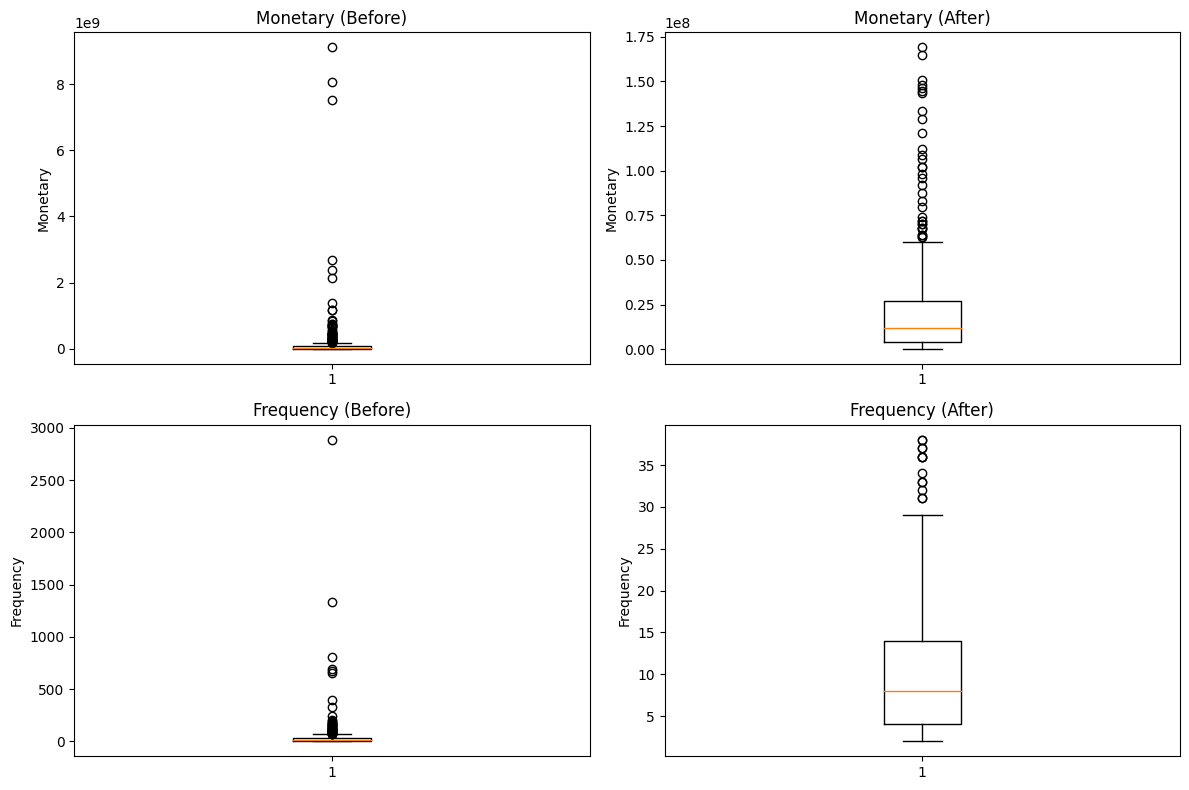

Data shape: (298, 4)
Data shape : (298, 4)
Data shape clean: (298, 4)


In [56]:
data_clean, scaler = preprocess_data(df)

In [57]:
data_clean.head()

,Recency,Frequency,Monetary,Freq_Rank
CUST CODE,,,,
AAJ002,0.064693,0.472222,0.053355,0.835017
ACH002,0.131579,0.305556,0.037381,0.700337
ADI007,0.899123,0.000000,0.011947,0.084175
ADI012,0.201754,0.027778,0.072627,0.158249
AGU020,0.199561,0.000000,0.005540,0.090909


In [58]:
data_clean.describe()

,Recency,Frequency,Monetary,Freq_Rank
count,298.000000,298.000000,298.000000,298.000000
mean,0.183876,0.232942,0.138570,0.500000
std,0.163526,0.240712,0.190717,0.290133
min,0.000000,0.000000,0.000000,0.000000
25%,0.098684,0.055556,0.020705,0.250000
50%,0.132675,0.166667,0.067106,0.500000
75%,0.229167,0.333333,0.158612,0.750000
max,1.000000,1.000000,1.000000,1.000000


**Clustering**

**1. Ranking**

In [59]:
data_bin = data_clean.copy()

In [62]:
def binning_rfm(df):
    quantiles = df.quantile(q=[0.2, 0.4, 0.6, 0.8])

    r_bins = [-np.inf] + list(quantiles['Recency']) + [np.inf]
    f_bins = [-np.inf] + list(quantiles['Freq_Rank']) + [np.inf]
    m_bins = [-np.inf] + list(quantiles['Monetary']) + [np.inf]

    labels = [1, 2, 3, 4, 5]

    labels_r = [5, 4, 3, 2, 1]

    df['R_Group'] = pd.cut(df['Recency'], bins=r_bins, labels=labels_r).astype(int)
    df['F_Group'] = pd.cut(df['Freq_Rank'], bins=f_bins, labels=labels).astype(int)
    df['M_Group'] = pd.cut(df['Monetary'], bins=m_bins, labels=labels).astype(int)

    df['RFM_Score'] = np.round((df['R_Group']+df['F_Group']+df['M_Group'])/3,2)

    return df

In [63]:
data_bin = binning_rfm(data_bin)

In [64]:
data_bin.head()

,Recency,Frequency,Monetary,Freq_Rank,R_Group,F_Group,M_Group,RFM_Score
CUST CODE,,,,,,,,
AAJ002,0.064693,0.472222,0.053355,0.835017,5,5,3,4.33
ACH002,0.131579,0.305556,0.037381,0.700337,3,4,2,3.00
ADI007,0.899123,0.000000,0.011947,0.084175,1,1,1,1.00
ADI012,0.201754,0.027778,0.072627,0.158249,2,1,3,2.00
AGU020,0.199561,0.000000,0.005540,0.090909,2,1,1,1.33


In [65]:
data_bin.dtypes

Recency      float64
Frequency    float64
Monetary     float64
Freq_Rank    float64
R_Group        int64
F_Group        int64
M_Group        int64
RFM_Score    float64
dtype: object

In [66]:
data_bin.describe()

,Recency,Frequency,Monetary,Freq_Rank,R_Group,F_Group,M_Group,RFM_Score
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.183876,0.232942,0.138570,0.500000,3.043624,3.000000,3.000000,3.014430
std,0.163526,0.240712,0.190717,0.290133,1.454626,1.418967,1.418967,1.202243
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.098684,0.055556,0.020705,0.250000,2.000000,2.000000,2.000000,2.000000
50%,0.132675,0.166667,0.067106,0.500000,3.000000,3.000000,3.000000,3.000000
75%,0.229167,0.333333,0.158612,0.750000,4.000000,4.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000


In [67]:
def assign_segment(rfm_df):
    labels = ['At Risk', 'Low Performance',
              'Average Performance', 'High Performance',
              'Top Customers']

    rfm_df['Segment'] = pd.cut(rfm_df['RFM_Score'],
                               bins = [0, 1, 2, 3, 4, 5],
                               labels = labels)
    return rfm_df

In [68]:
data_bin = assign_segment(data_bin)

In [69]:
data_bin.head()

,Recency,Frequency,Monetary,Freq_Rank,R_Group,F_Group,M_Group,RFM_Score,Segment
CUST CODE,,,,,,,,,
AAJ002,0.064693,0.472222,0.053355,0.835017,5,5,3,4.33,Top Customers
ACH002,0.131579,0.305556,0.037381,0.700337,3,4,2,3.00,Average Performance
ADI007,0.899123,0.000000,0.011947,0.084175,1,1,1,1.00,At Risk
ADI012,0.201754,0.027778,0.072627,0.158249,2,1,3,2.00,Low Performance
AGU020,0.199561,0.000000,0.005540,0.090909,2,1,1,1.33,Low Performance


In [70]:
rfm_with_segment = assign_segment(data_bin)
result = rfm_with_segment[['Recency', 'Monetary', 'Frequency', 'Segment']] \
    .groupby('Segment') \
    .agg({'min', 'max', 'mean', 'std'})

result

Recency                                Monetary  \
                          min       max       std      mean       min   
Segment                                                                 
At Risk              0.277412  0.899123  0.191509  0.456725  0.000000   
Low Performance      0.098684  1.000000  0.172759  0.286515  0.000157   
Average Performance  0.033991  0.800439  0.158187  0.195577  0.004368   
High Performance     0.000000  0.407895  0.065421  0.120100  0.029734   
Top Customers        0.000000  0.132675  0.034493  0.060910  0.053355   

                                                  Frequency            \
                          max       std      mean       min       max   
Segment                                                                 
At Risk              0.013403  0.004073  0.005819  0.000000  0.027778   
Low Performance      0.109546  0.021553  0.024362  0.000000  0.166667   
Average Performance  0.254342  0.060009  0.063540  0.000000  0.333333   
High Performance     0.854344  0.162434  0.168731  0.027778  0.833333   
Top Customers        1.000000  0.254944  0.359786  0.138889  1.000000   

                                         
                          std      mean  
Segment                                  
At Risk              0.014086  0.011111  
Low Performance      0.034530  0.038432  
Average Performance  0.084708  0.127934  
High Performance     0.190377  0.315049  
Top Customers        0.235563  0.541204

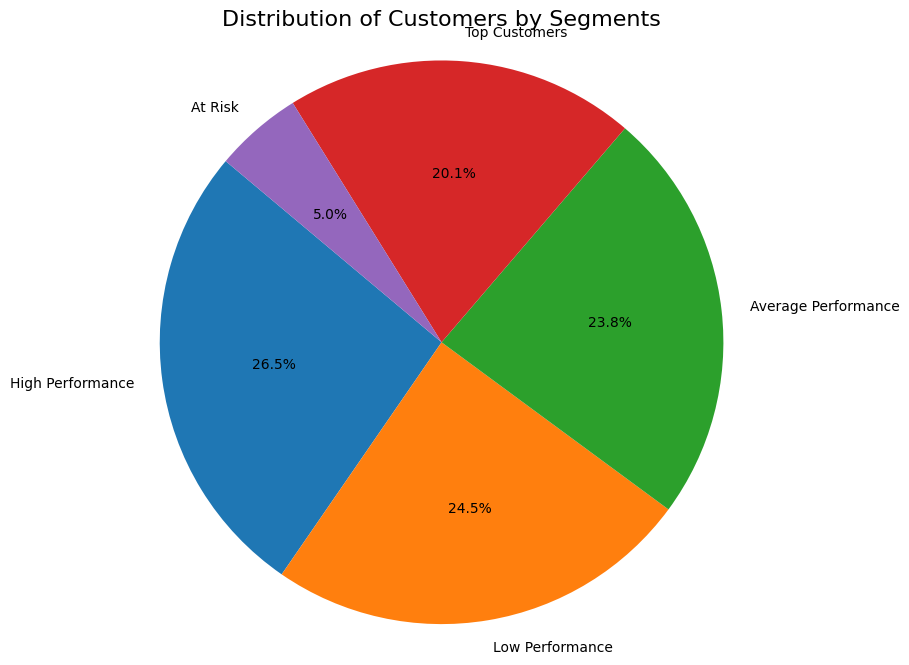

In [95]:
plt.figure(figsize=(8, 8))
segment_counts = data_bin['Segment'].value_counts()
labels = segment_counts.index
sizes = segment_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Customers by Segments', size=16)
plt.axis('equal')

plt.show()


In [72]:
under_2 = len(data_bin[data_bin['RFM_Score'] <= 2])

print("Number of customers with RFM score <= 2:", under_2)

Number of customers with RFM score <= 2: 88


In [73]:
# Inverse transform data_bin
for col in ['Recency', 'Frequency', 'Monetary']:

    x = data_bin[col]

    # Find index
    idx = scaler.feature_names_in_.tolist().index(col)
    max_val = scaler.data_max_[idx]
    min_val = scaler.data_min_[idx]

    data_bin[col] = x*(max_val-min_val) + min_val

<ipython-input-74-40a7a2f6348d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_bin,
<ipython-input-74-40a7a2f6348d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_bin,
<ipython-input-74-40a7a2f6348d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_bin,


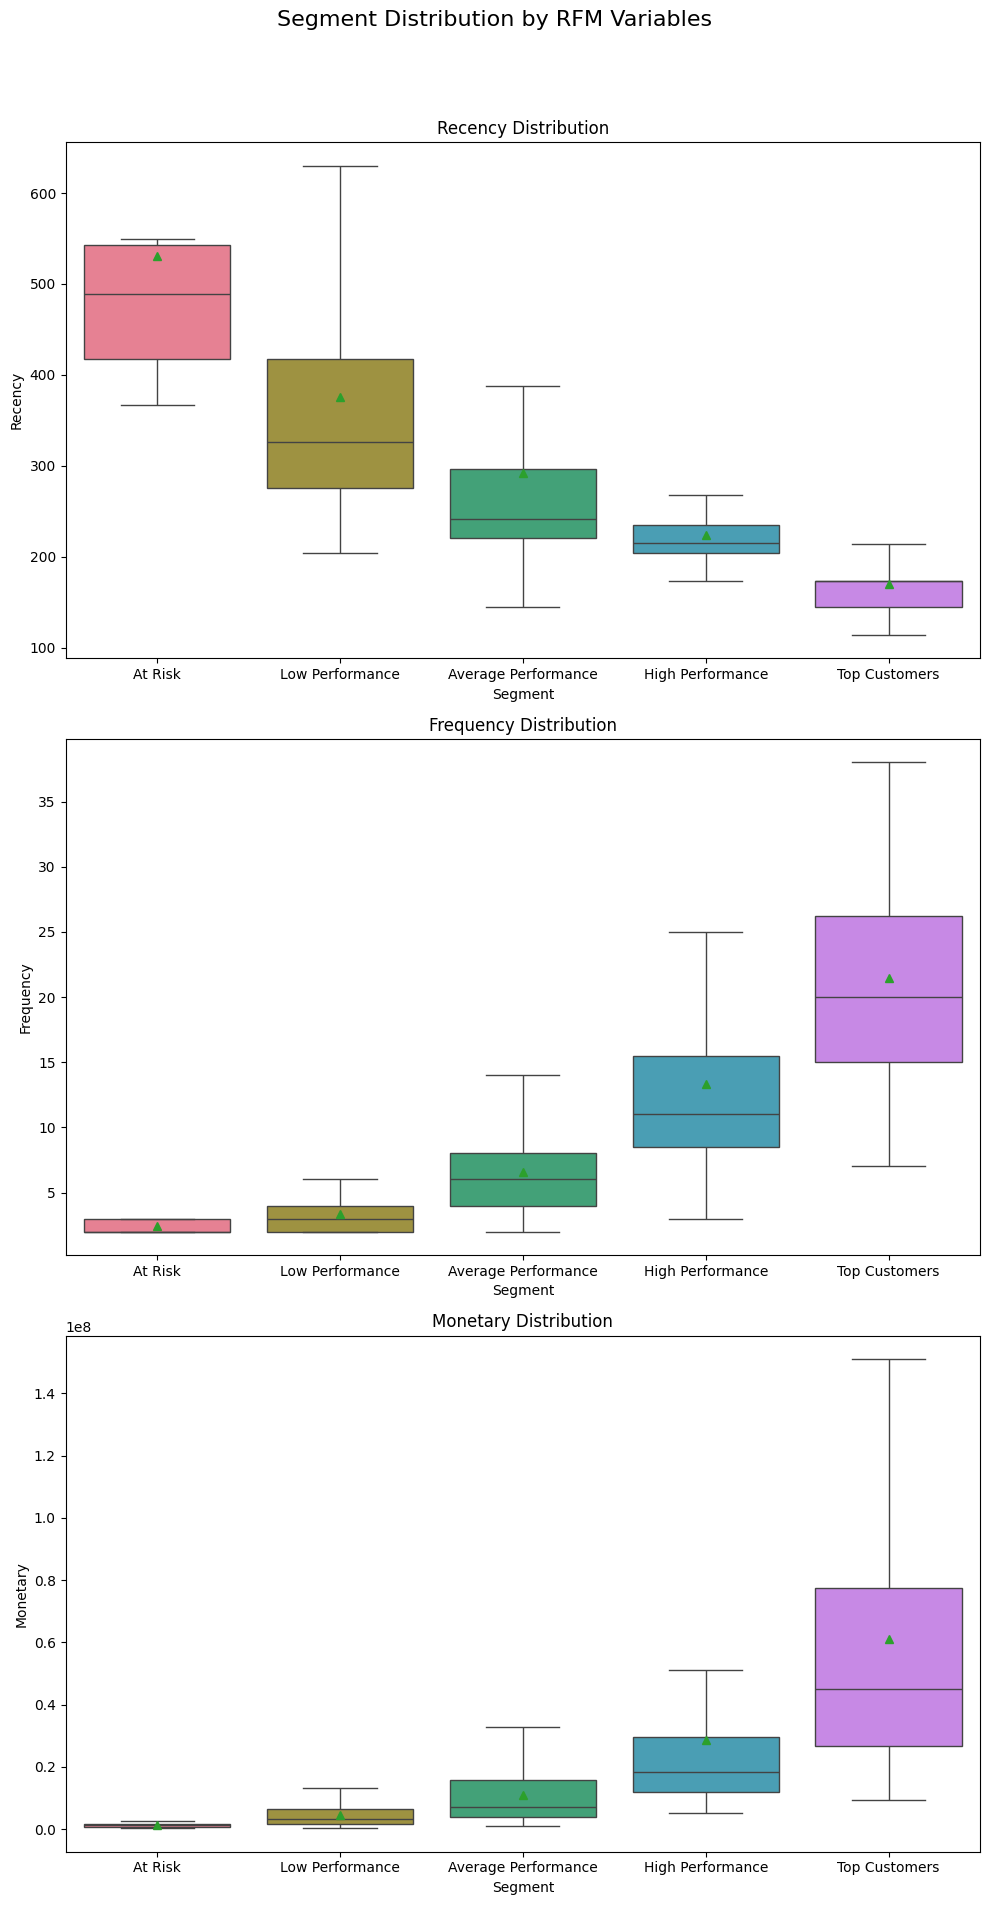

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

colors = sns.color_palette("husl", n_colors=len(data_bin['Segment'].unique()))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data=data_bin,
                x='Segment',
                y=col,
                ax=axes[i],
                palette=colors,
                orient='v',  # Vertical
                showmeans=True,  # Show mean
                showfliers=False)  # Hide outliers

    axes[i].set_title(f'{col} Distribution')

# Add title and adjust layout
plt.suptitle('Segment Distribution by RFM Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [75]:
data_bin.groupby('Segment').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':'mean'}).round(2)

,Recency,Frequency,Monetary
Segment,,,
At Risk,530.53,2.40,1220693.33
Low Performance,375.30,3.38,4351395.89
Average Performance,292.37,6.61,10966145.07
High Performance,223.53,13.34,28726443.04
Top Customers,169.55,21.48,60983595.00


In [76]:
data_bin['Segment'].value_counts()

High Performance       79
Low Performance        73
Average Performance    71
Top Customers          60
At Risk                15
Name: Segment, dtype: int64

**K-Means Clustering**

In [77]:
from sklearn.cluster import KMeans

In [78]:
data_cluster_clean = data_clean[['Recency', 'Frequency', 'Monetary']]

In [79]:
inertia = []

# iterate
for k in range(1, 11):

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    kmeans.fit(data_cluster_clean)

    inertia.append(kmeans.inertia_)

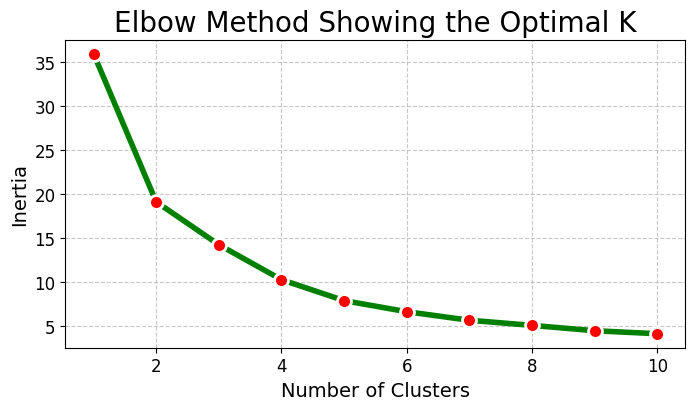

In [80]:
plt.figure(figsize=(8, 4))

sns.lineplot(x=range(1, 11), y=inertia, color='green',
             linewidth=4, marker='o', markersize=10,
             markerfacecolor='red', markeredgewidth=2)

plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method Showing the Optimal K', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [81]:
# Refit best data
kmeans_best = KMeans(n_clusters = 3,
                     random_state = 42,
                     n_init = 10)

kmeans_best.fit(data_cluster_clean)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [82]:
data_label = kmeans_best.predict(data_cluster_clean)
data_label

array([0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0,
       0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0], dtype=i

In [90]:
centroids = kmeans_best.cluster_centers_

In [91]:
centroid_df = pd.DataFrame(centroids,
                           columns=['Recency', 'Frequency', 'Monetary']).rename_axis('Cluster', axis='index')

centroid_df

,Recency,Frequency,Monetary
Cluster,,,
0,0.142392,0.147606,0.077262
1,0.096540,0.596186,0.371830
2,0.501326,0.040052,0.043165


In [92]:
# Inverse transform data
data_cluster = pd.DataFrame(scaler.inverse_transform(data_clean))
data_cluster.index = data_clean.index
data_cluster.columns = data_clean.columns

data_cluster = data_cluster[['Recency', 'Frequency', 'Monetary']]
data_cluster['label'] = data_label
data_cluster.head()

,Recency,Frequency,Monetary,label
CUST CODE,,,,
AAJ002,173.0,19.0,9246600.0,0
ACH002,234.0,13.0,6549600.0,0
ADI007,934.0,2.0,2255300.0,2
ADI012,298.0,3.0,12500400.0,0
AGU020,296.0,2.0,1173600.0,0


In [93]:
data_cluster.groupby('label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'label':'count',
}).round(1)

,Recency,Frequency,Monetary,label
label,,,,
0,243.9,7.3,13282947.3,188
1,202.0,23.5,63017120.9,67
2,571.2,3.4,7526095.3,43


In [94]:
def assign_label(val):
    if val == 0:
        return 'Average Performance'
    elif val == 1:
        return 'High Performance'
    else:
        return 'Low Performance'

data_cluster['Segment'] = data_cluster['label'].apply(assign_label)

# check result
data_cluster.head()

,Recency,Frequency,Monetary,label,Segment
CUST CODE,,,,,
AAJ002,173.0,19.0,9246600.0,0,Average Performance
ACH002,234.0,13.0,6549600.0,0,Average Performance
ADI007,934.0,2.0,2255300.0,2,Low Performance
ADI012,298.0,3.0,12500400.0,0,Average Performance
AGU020,296.0,2.0,1173600.0,0,Average Performance


<ipython-input-88-67378b993563>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cluster,
<ipython-input-88-67378b993563>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cluster,
<ipython-input-88-67378b993563>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cluster,


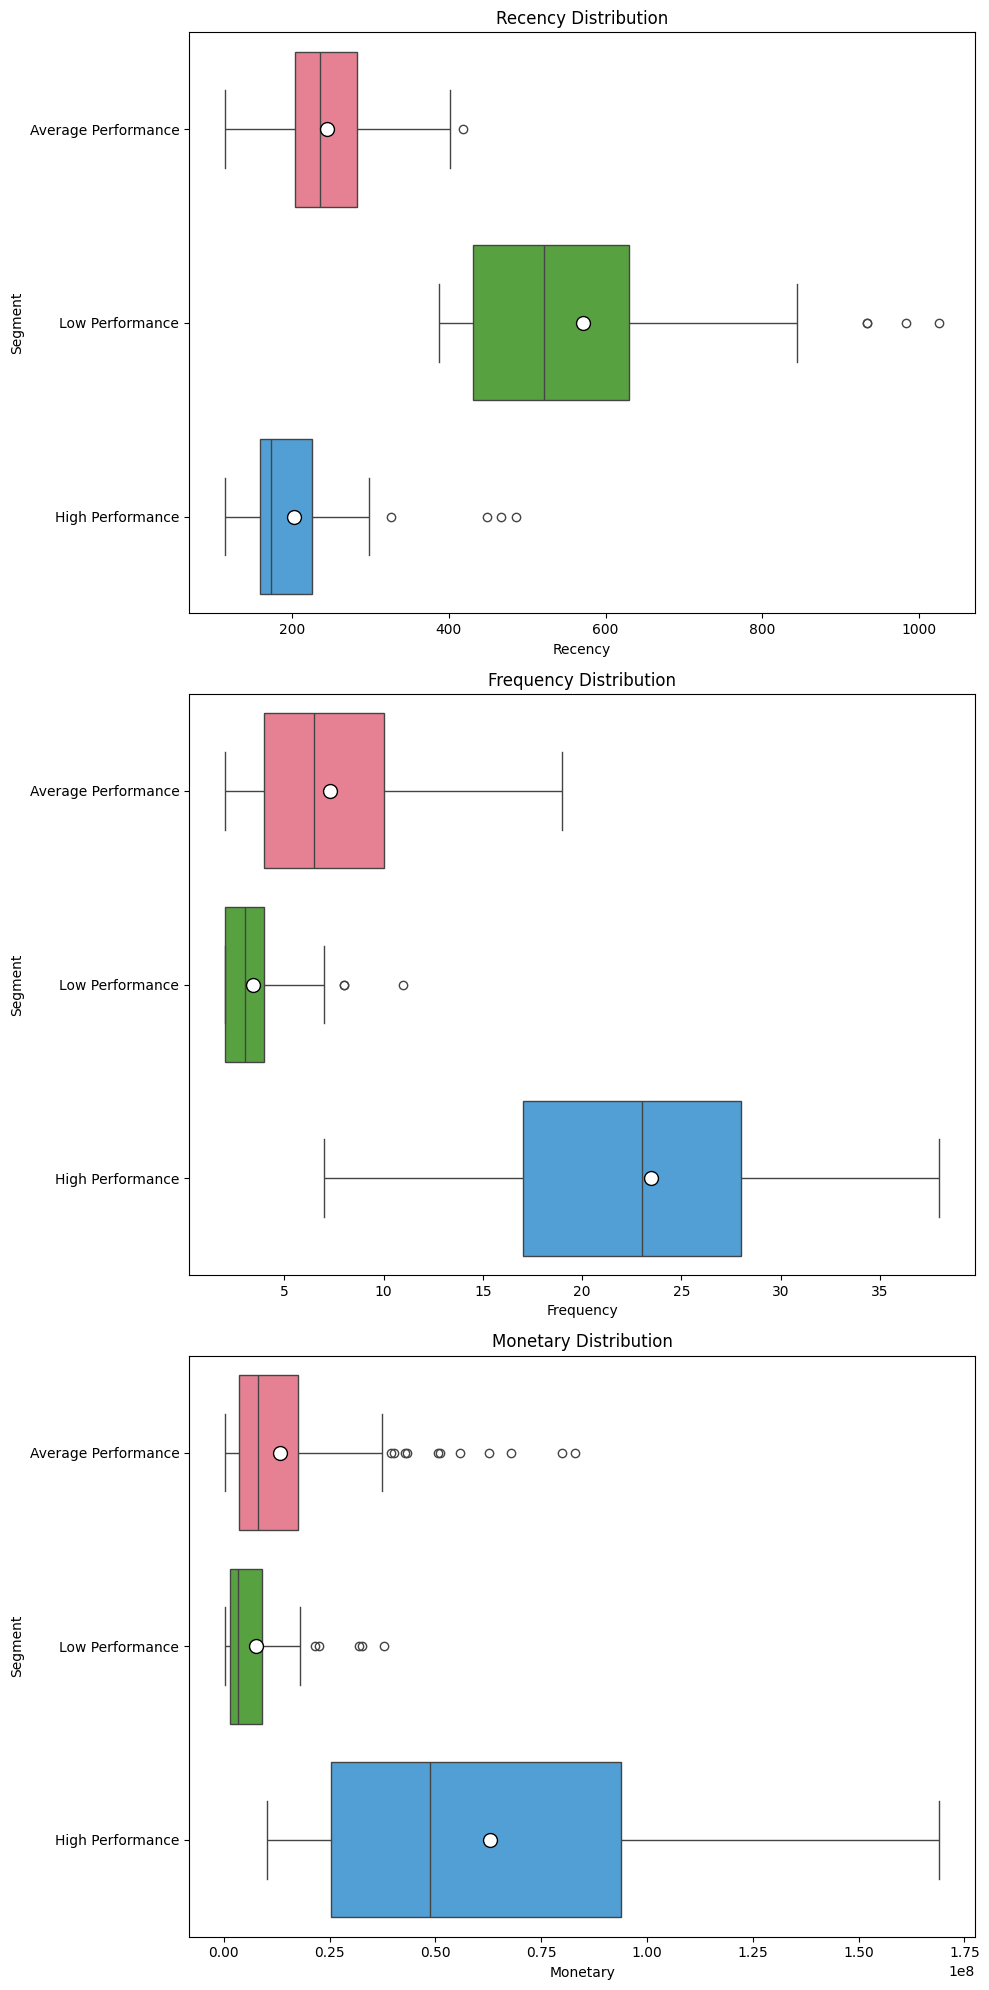

In [88]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

colors = sns.color_palette("husl", n_colors=len(data_cluster['Segment'].unique()))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data=data_cluster,
                y='Segment',
                x=col,
                ax=axes[i],
                palette=colors,
                showmeans=True,  # Show mean
                meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})  # Custom marker for mean

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


In [89]:
data_cluster.groupby('Segment').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':'mean',
                                 'Segment':'count'}).round(2)

,Recency,Frequency,Monetary,Segment
Segment,,,,
Average Performance,243.86,7.31,13282947.34,188
High Performance,202.04,23.46,63017120.90,67
Low Performance,571.21,3.44,7526095.35,43


================ END ================

**COHORT ANALYSIS**

In [ ]:

# def CohortAnalysis(dataframe):
#     data = dataframe.copy()
#     data = data[["CUST CODE", "INVOICE NO", "INVOICE DATE"]].drop_duplicates()
#     data["order_month"] = data["INVOICE DATE"].dt.to_period("M")
#     data["cohort"] = data.groupby("CUST CODE")["INVOICE DATE"].transform("min").dt.to_period("M")

#     cohort_data = data.groupby(["cohort", "order_month"]).agg(n_customers=("CUST CODE", "nunique")).reset_index(drop=False)
#     cohort_data["period_number"] = (cohort_data["order_month"] - cohort_data["cohort"]).apply(lambda x: x.n)
#     cohort_pivot = cohort_data.pivot_table(index="cohort", columns="period_number", values="n_customers")
#     cohort_size = cohort_pivot.iloc[:, 0]
#     retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

#     with sns.axes_style("white"):
#         fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})

#         sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, cbar=False, fmt=".0%", cmap="coolwarm", ax=ax[1])
#         ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)
#         ax[1].set(xlabel="# of periods", ylabel="")

#         white_cmap = plt.cm.get_cmap('Greys', 256)
#         white_cmap.set_bad('white')
#         sns.heatmap(pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}), annot=True, cbar=False, fmt="g", cmap=white_cmap, ax=ax[0])

#         fig.tight_layout()

# CohortAnalysis(eda_data)

**CLV SECTION **


**BG/NBD**

**In Depth Analysis & Recommendation**

In [ ]:

# data_clean_ori = pd.DataFrame(scaler.inverse_transform(data_clean))

# data_clean_ori.index = data_clean.index

# data_clean_ori.columns = data_clean.columns

In [ ]:
data_clean_ori.describe()

In [ ]:
# Plot recency
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Recency'])
plt.title('Recency Distribution', fontsize=15)


In [ ]:
# Plot monetary
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Monetary'])
plt.title('Monetary Distribution', fontsize=15)
#plt.xlim(0,40000)

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['Frequency'])
plt.title('Frequency Distribution', fontsize=10)

In [ ]:
data_cluster.head()

In [ ]:
rfm_datas_agg = data_cluster.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'label':'count',
}).round(1)

# rename
rfm_datas_agg.columns = ['Recency', 'Frequency', 'Monetary', 'Count Customers']

In [ ]:
rfm_datas_agg

In [ ]:
rfm_datas_agg['pctg revenue'] = np.round(rfm_datas_agg['Monetary']*rfm_datas_agg['Count Customers']/(rfm_datas_agg['Monetary']*rfm_datas_agg['Count Customers']).sum()*100,2)

#show data
rfm_datas_agg

In [ ]:

customer_segments = data_cluster.copy().reset_index()

customer_segments = customer_segments[['CUST CODE', 'Segment']]

customer_segments.head()